# K-Means Clustering of Images

Problem: Imagine we have a dataset of images without labels and we want to annotate them (1 image == 1 class). Rather then going over each image sequentially, we will try to cluster them to make our life easier. 

One possible way of doing that:

```
1. Take some dataset with images from Kaggle & download it.
        |
        V
2. Choose a subset of the dataset. 
(only for the demonstration here => we need the computation to be faster)
        |
        V
3. Use an already trained CNN to get the embeddings of our images.
        |
        V
4. Cluster the obtained embeddings.
        |
        V
5. Visualise the results.
```

**Why use Image Embeddings**?

Embedings == a dense numerical representations of some object expressed as a vector.

```
-----------
|   o  o  |
|     J   |    ->  [0.151, 0.8964, 0.4645, ..., 0.154]
|   -__-  |
-----------

-----------
|  O   o  |
|    U    |    ->  [0.148, 0.7856, 0.4641, ..., 0.121]
|   HHH   |
-----------

-----------
|   /\    |
|  /--\   |    ->  [0.845, 0.1245, 0.7845, ..., 0.008]
|  | D|   |
-----------
```

1. The images with similar features have more similar embeddings and therefore should be clustered closer together.

2. Inputs of clustering need to be of the same size.

## Datasets

[Flower images](https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images) (`flowers`): 

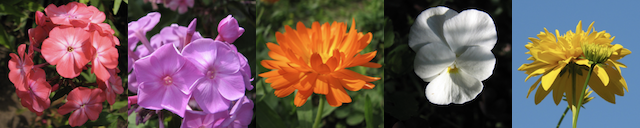

- 210 images (128x128x3) 
- 10 species of flowering plants

[Weather](https://www.kaggle.com/datasets/somesh24/multiclass-images-for-weather-classification) (`weather`):

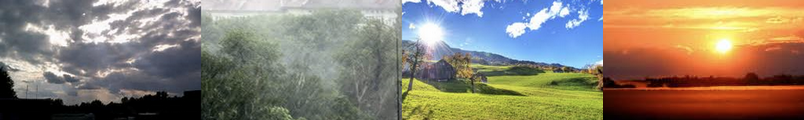

- 1125 images (different sizes)
- 4 classes (cloudy, rain, shine, sunrise)

[Scenery](https://www.kaggle.com/datasets/nitishabharathi/scene-classification) (`scenery`):

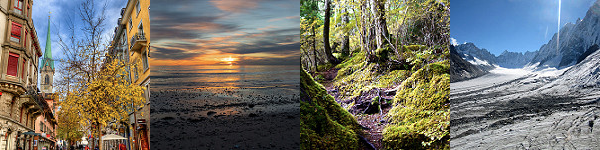

- ~25k images (150x150x3)
- 6 classes (buildings, forests, mountains, glacier, street, sea)

[Alberta Wildlife](https://www.kaggle.com/datasets/navidre/alberta-wildlife-dataset) (`animals`):

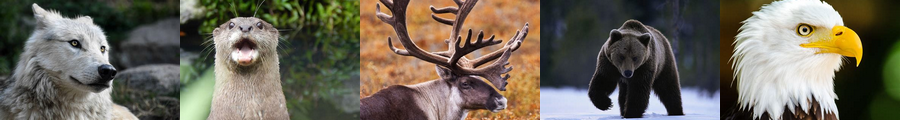

- 100 images per animal (different sizes)
- 21 species

In [ ]:
###########################
# TODO: Choose a dataset. #
###########################
dataset = ''

In [ ]:
if dataset == 'flowers':
  DATASET = 'olgabelitskaya/flower-color-images'
  ZIP_PATH = '/content/aml_test/flower-color-images.zip'
  IMAGES_PATH = '/content/aml_test/flower_images/flower_images'
elif dataset == 'weather':
  DATASET = 'somesh24/multiclass-images-for-weather-classification'
  ZIP_PATH = '/content/aml_test/multiclass-images-for-weather-classification.zip'
  IMAGES_PATH = '/content/aml_test/dataset2/'
elif dataset == 'scenery':
  DATASET = 'nitishabharathi/scene-classification'
  ZIP_PATH = '/content/aml_test/scene-classification.zip'
  IMAGES_PATH = '/content/aml_test/train-scene classification/train/'
elif dataset == 'animals':
  DATASET = 'navidre/alberta-wildlife-dataset'
  ZIP_PATH = '/content/aml_test/alberta-wildlife-dataset.zip'
  IMAGES_PATH = '/content/aml_test/images_and_urls/images_and_urls/images/'
else:
  print('Pls choose a valid dataset.')

Download the chosen dataset: 

*(If you have your own account on Kaggle, you can put your API key instead of mine. You can generate it at `https://www.kaggle.com/<YOUR_LOGIN>/account` in the "API" section.)*

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

!kaggle datasets download -d {DATASET} -p /content/aml_test

Unzip the downloaded `.zip` file:

In [ ]:
import zipfile

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall('/content/aml_test/')

Get paths to the images that will be clustered:

In [ ]:
import random

# this list will hold the paths to only the images we chose for clustering
sample_paths = []

if dataset == 'animals':
  ##############################################################################
  # TODO: If you are using the 'animals' dataset, specify the directories with # 
  # animals of your choice (e.g. put 'grizzly_bear/', 'bald_eagle/', ... to    #
  # the subdirs list)                                                          #
  # Ignore otherwise.                                                          #
  ##############################################################################
  # Bonus: If you have the time, you can check why this dataset had to be #
  # treated in a special way.                                             #
  #########################################################################
  subdirs = ['']
else:
  subdirs = ['']

for subdir in subdirs:
  subdir_path = IMAGES_PATH + '/' + subdir
  print(f'Looking for relevant image files in directory "{subdir_path}".')
  for filename in os.listdir(subdir_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
      sample_paths.append(subdir_path + filename)

################################################################################
# TODO: either choose the subset of images randomly or you can do it in a      #
# better way - e.g. choose the same number of samples for each real class (the #
# labels are present in separate .csv file, or directly in the file names).    #
################################################################################
print(f'Found {len(sample_paths)} images.')
if len(sample_paths) > 150:
  random.seed(666)
  sample_paths = random.sample(sample_paths, 150)  # take only 150 random images

## Embeddings

We will use the same CNN you had already used before at our session on CNNs - [MobileNet](https://keras.io/api/applications/mobilenet/). We will use it to transform our images to their embeddings.

In [ ]:
from keras.applications.mobilenet import MobileNet 
from keras.models import Model

model = MobileNet()

################################################################################
# TODO: What needs to be done here? :)                                         #
# Let me know if you think you know it theoretically, but are unsure about how #
# to code it.                                                                  #
################################################################################
model = Model(inputs=model.inputs, outputs=# TODO)
model.summary()

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img
from keras.applications.vgg16 import preprocess_input 

def compute_embedding(file, model):
  ################################################################
  # TODO: Add the correct image sizes here (e.g. "10, 10").      #
  # Hint: Notice what is the dimension of the model's input.     #
  ################################################################
  img = load_img(file, target_size=(# TODO, # TODO)
  img = np.array(img)
  # reshape the data for the model args: num_of_samples, dim1, dim2, channels
  reshaped_img = img.reshape(1, # TODO, # TODO, 3)
  imgx = preprocess_input(reshaped_img)
  features = model.predict(imgx, use_multiprocessing=True)  # get the embedding
  return features

Generate the embeddings for all images in our subset: 

*(takes around 1-2 minute(s))*

In [ ]:
image_embeddings = {}  # dictionary in format: image_path -> image_embedding

for sample_path in sample_paths:
    feat = compute_embedding(sample_path, model)
    image_embeddings[sample_path] = feat

In [ ]:
# get a list of just the embeddings
embeddings = np.array(list(image_embeddings.values()))

# reshape so that the embeddings are vectors of the correct size
# (there is one unnecessary dimension more)
embeddings = embeddings.reshape(-1, len(embeddings[0][0]))
print(len(embeddings))

embeddings

In [ ]:
len(embeddings[0])

## Dimensionality Reduction

Now since we also want to visualise our results in 2D and 3D, we need to use some dimensionality reduction technique on our embeddings.

**PCA** is a very good candidate for that - it linearly transforms the input data into a new coordinate system where the variation in the data can be described with fewer dimensions. 



In [ ]:
from sklearn.decomposition import PCA

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=42)
pca.fit(embeddings)
embeddings_reduced = pca.transform(embeddings)

print(f'Components before PCA: {embeddings.shape[1]}')
print(f'Components after PCA: {pca.n_components}')

Now we can plot the reduced embeddings in 2D and 3D:

In [ ]:
import matplotlib.pyplot as plt

def visualise_embeddings_2d(sample_features, colors=None, centroids=None):
  plt.scatter(sample_features[0:,0], sample_features[0:,1], c=colors, alpha=0.8)

  if centroids is not None:
    plt.scatter(centroids[0:,0], centroids[0:,1], c='red', marker='x', alpha=0.8)

    # plot a line from each sample to its closest centroid:
    for i in range(len(sample_features)):
      sample_i_centroid = centroids[colors[i]]
      x = [sample_features[i][0], sample_i_centroid[0]]
      y = [sample_features[i][1], sample_i_centroid[1]]
      plt.plot(x, y, c='grey', alpha=0.2)

  plt.show()

visualise_embeddings_2d(embeddings_reduced)

In [ ]:
# 3D visualisation:

def visualise_embeddings_3d(sample_features, colors=None, centroids=None):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.scatter3D(sample_features[0:,0], sample_features[0:,1], sample_features[0:,2], c=colors, alpha=0.8)

  if centroids is not None:
    ax.scatter3D(centroids[0:,0], centroids[0:,1], centroids[0:,2], c='red', marker='x', alpha=0.8)

    # plot a line from each sample to its closest centroid:
    for i in range(len(sample_features)):
      sample_i_centroid = centroids[colors[i]]
      x = [sample_features[i][0], sample_i_centroid[0]]
      y = [sample_features[i][1], sample_i_centroid[1]]
      z = [sample_features[i][2], sample_i_centroid[2]]
      ax.plot(x, y, z, c='grey', alpha=0.2)

visualise_embeddings_3d(embeddings_reduced)

In [ ]:
###############################################
# TODO: Can we already observe some clusters? #
###############################################

## K-Means Clustering

Choosing the correct K for K-Means clustering is not an easy task. Sometimes we have the information about classes in our data from an outside source, sometimes we have no idea at all. 

It is also important to choose the right similarity function. `sklearn.cluster.KMeans` uses Euclidean distance. Is it the best choice?

In [ ]:
from sklearn.cluster import KMeans

##########################################################################
# TODO: Choose the number of clusters you think will be the best. If you #
# have the time, you can try multiple different values.                  #
##########################################################################
k = # TODO
  
kmeans = KMeans(n_clusters=k)
kmeans.fit(embeddings_reduced)

The cluster label for each of our samples can be found here:

In [ ]:
kmeans.labels_

Now we can plot the data again, but now coloured by the clusters they belong to. What can we see here? 

In [ ]:
visualise_embeddings_2d(embeddings_reduced, kmeans.labels_, kmeans.cluster_centers_)

In [ ]:
visualise_embeddings_3d(embeddings_reduced, kmeans.labels_, kmeans.cluster_centers_)

Can we see some obvious boundaries, or are they not very clear? If not - we will most probably have "misclassifications" of images. Or it also might be the case that plotting only 2-3 main components of PCA is not enough and the information that gets lost is just too much.

Finally, our original labeling task is simplified - now most of our clusters are of the same class and ideally we only need to focus on images that occur at the boundaries of our clusters.

## The Results

For each cluster visualise the images it contains:

In [ ]:
# dictionary in format: cluster_id -> [image_path1, image_path2, ... image_pathN]
# (contains images of each cluster)
clusters = {}

for file_path, cluster_label in zip(sample_paths, kmeans.labels_):
    if cluster_label not in clusters.keys():
        clusters[cluster_label] = []
        clusters[cluster_label].append(file_path)
    else:
        clusters[cluster_label].append(file_path)

In [ ]:
# look at the size of cluster 0
len(clusters[0])

In [ ]:
def show_images_in_cluster(cluster_id):
    plt.figure(figsize = (25,25))
    images_in_cluster = clusters[cluster_id]
    # plot each image in the cluster:
    for index, file_name in enumerate(images_in_cluster):
        fig = plt.subplot(10, 10, index+1);
        img = load_img(file_name)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
show_images_in_cluster(0)

In [ ]:
show_images_in_cluster(1)

In [ ]:
show_images_in_cluster(2)

In [ ]:
########################################
# TODO: plot the rest of your clusters #
########################################

How can we make this approach better???

Can we use an AutoEncoder somewhere in this pipeline? If yes, where and how? If not, why not?

In [ ]:
############################################################################
# TODO: If you have the time, you can try to use the VGG16 model           #
# (https://www.geeksforgeeks.org/vgg-16-cnn-model/) instead. Computing the #
# embeddings takes a longer time than on the MobileNet - is it worth?      #
############################################################################